In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
tips=pd.read_csv('/home/rishav/Desktop/globsyn-python-intern-training/Dataset/tips.csv')

In [54]:
features = (tips.columns)
x = tips.drop(['tip'], axis=1)
print(x)
y=tips.tip



     total_bill     sex smoker   day    time  size
0         16.99  Female     No   Sun  Dinner     2
1         10.34    Male     No   Sun  Dinner     3
2         21.01    Male     No   Sun  Dinner     3
3         23.68    Male     No   Sun  Dinner     2
4         24.59  Female     No   Sun  Dinner     4
..          ...     ...    ...   ...     ...   ...
239       29.03    Male     No   Sat  Dinner     3
240       27.18  Female    Yes   Sat  Dinner     2
241       22.67    Male    Yes   Sat  Dinner     2
242       17.82    Male     No   Sat  Dinner     2
243       18.78  Female     No  Thur  Dinner     2

[244 rows x 6 columns]


In [55]:
features = (tips.columns)
x=tips [ list(features.drop(['tip']))  ]
print(x)
y=tips.tip

     total_bill     sex smoker   day    time  size
0         16.99  Female     No   Sun  Dinner     2
1         10.34    Male     No   Sun  Dinner     3
2         21.01    Male     No   Sun  Dinner     3
3         23.68    Male     No   Sun  Dinner     2
4         24.59  Female     No   Sun  Dinner     4
..          ...     ...    ...   ...     ...   ...
239       29.03    Male     No   Sat  Dinner     3
240       27.18  Female    Yes   Sat  Dinner     2
241       22.67    Male    Yes   Sat  Dinner     2
242       17.82    Male     No   Sat  Dinner     2
243       18.78  Female     No  Thur  Dinner     2

[244 rows x 6 columns]


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [57]:
o1=OrdinalEncoder()
categories=['sex','smoker','day','time']
o1.fit(x_train[categories])
x_train[categories]=o1.transform(x_train[categories])
x_test[categories]=o1.transform(x_test[categories])



In [59]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
y_predicted=lr.predict(x_test)
print(y_test,y_predicted)

63     3.76
29     3.00
51     2.60
230    2.00
65     3.15
       ... 
162    2.00
90     3.00
216    3.00
57     1.50
116    5.07
Name: tip, Length: 61, dtype: float64 [3.06147155 3.03202112 2.14115244 3.59045261 3.10877729 2.45203203
 2.34768466 1.67516738 2.1021542  2.4934907  2.79035647 3.11695752
 2.6732018  2.57702342 2.73608766 4.85203117 3.24058886 2.73438753
 2.73301779 3.49412166 2.48717413 2.40287075 2.2599692  2.50459787
 2.1770415  1.92289399 2.08240912 3.50552433 2.69648072 2.9010376
 1.95634348 2.65563885 2.82272262 2.38791495 3.65164148 3.00750478
 5.4298656  3.14946971 3.03604317 3.86465529 2.1716297  2.36387036
 2.14700478 5.88670164 2.24255229 2.27787437 2.45973395 2.38111696
 2.42798743 2.05836453 3.02139751 2.83551431 3.83229509 2.31453193
 4.56427139 2.45542477 2.8540161  3.74363926 4.13870328 3.65718056
 4.15982093]


In [68]:
rs=pd.DataFrame({'Test':y_test.values,'Pred':y_predicted})
rs

,Test,Pred
0,3.76,3.061472
1,3.00,3.032021
2,2.60,2.141152
3,2.00,3.590453
4,3.15,3.108777
...,...,...
56,2.00,2.854016
57,3.00,3.743639
58,3.00,4.138703
59,1.50,3.657181


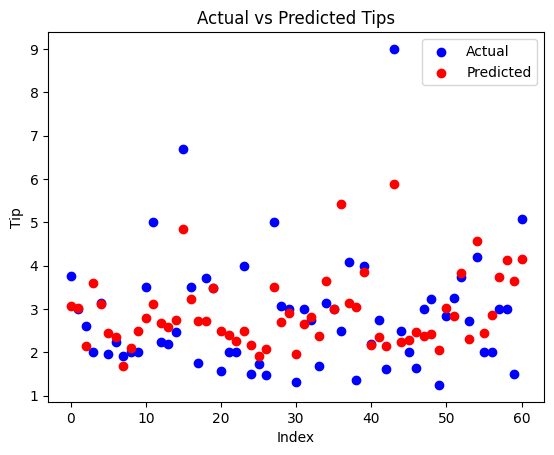

In [73]:
plt.figure()
plt.scatter(rs.index, rs['Test'], color='blue', label='Actual')
plt.scatter(rs.index, rs['Pred'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Tip')
plt.legend()
plt.title('Actual vs Predicted Tips')
plt.show()